1. Tentukan Library yang digunakan

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

2. Load Dataset

In [5]:
data = pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [7]:
data.shape

(4303, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [9]:
#menghapus kolom
kolom_yang_dihapus = ['Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'smoking', 'drinking', 'family_histroy']
data.drop(kolom_yang_dihapus, axis=1, inplace=True)
#axis=1 berguna untuk menghapus kolom
#inplace=True perubahan akan diterapkan langsung pada objek DataFrame yang ada dan tidak akan menghasilkan DataFrame baru.

In [10]:
data.tail()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,FFPG,Diabetes
4298,54,1,23.4,126,75,6.82,5.00,6.70,1
4299,50,2,22.3,115,84,5.32,4.37,6.55,1
4300,67,1,24.6,138,81,4.85,3.89,6.80,1
4301,60,2,29.0,101,60,6.70,5.91,7.00,1
4302,37,1,34.3,120,71,4.97,5.42,8.20,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       4303 non-null   int64  
 1   Gender    4303 non-null   int64  
 2   BMI       4303 non-null   float64
 3   SBP       4303 non-null   int64  
 4   DBP       4303 non-null   int64  
 5   FPG       4303 non-null   float64
 6   Chol      4303 non-null   float64
 7   FFPG      4303 non-null   float64
 8   Diabetes  4303 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 302.7 KB


In [12]:
data.shape

(4303, 9)

In [13]:
data['Diabetes'].value_counts()

Diabetes
0    3000
1    1303
Name: count, dtype: int64

3. Memisahkan Data atribut dan Label

In [14]:
X = data.drop(columns='Diabetes', axis=1)
Y = data['Diabetes']

In [15]:
print(X)

      Age  Gender   BMI  SBP  DBP   FPG  Chol  FFPG
0      26       1  20.1  119   81  5.80  4.36  5.40
1      40       1  17.7   97   54  4.60  3.70  4.10
2      40       2  19.7   85   53  5.30  5.87  4.85
3      43       1  23.1  111   71  4.50  4.05  5.30
4      36       1  26.5  130   82  5.54  6.69  5.53
...   ...     ...   ...  ...  ...   ...   ...   ...
4298   54       1  23.4  126   75  6.82  5.00  6.70
4299   50       2  22.3  115   84  5.32  4.37  6.55
4300   67       1  24.6  138   81  4.85  3.89  6.80
4301   60       2  29.0  101   60  6.70  5.91  7.00
4302   37       1  34.3  120   71  4.97  5.42  8.20

[4303 rows x 8 columns]


In [16]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4298    1
4299    1
4300    1
4301    1
4302    1
Name: Diabetes, Length: 4303, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, stratify=Y, random_state=20)
#stratify=Y Parameter ini memastikan bahwa pembagian data antara data pelatihan dan pengujian akan mempertahankan proporsi kelas yang 
# sama seperti dalam variabel target Y.

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(4303, 8) (4283, 8) (20, 8)


5. Membuat Data Latih Menggunakan Algoritma Naive Bayes

In [52]:
KNN = KNeighborsClassifier(n_neighbors=6)
#membuat sebuah objek klasifikasi Naive Bayes Gaussian (Gaussian NB) yang akan digunakan untuk melakukan klasifikasi atau prediksi 

In [53]:
KNN.fit(X_train, Y_train)
#langkah untuk melatih model dengan menggunakan data pelatihan

KNeighborsClassifier(n_neighbors=6)

6. Membuat Model Evaluasi Untuk Mengukur Tingkat Akurasi

In [54]:
Y_pred = KNN.predict(X_test)
#melakukan prediksi pada data pengujian

In [55]:
cm = confusion_matrix(Y_test, Y_pred)
#untuk menghitung confusion matrix dengan memberikan gambaran tentang sejauh mana model berhasil atau gagal dalam 
# memprediksi kelas data pengujian

ac = accuracy_score(Y_test,Y_pred)
#untuk mengukur sejauh mana model berhasil dalam memprediksi kelas yang benar pada data pengujian. 
print(cm)
print(ac)

[[13  1]
 [ 4  2]]
0.75


In [26]:
X_test_prediction = KNN.predict(X_test)
#langkah untuk melakukan prediksi pada data pengujian (X_test) menggunakan model classifier yang sudah di latih. 
# Hasil prediksi akan disimpan dalam variabel X_test_prediction.

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
#membandingkan variabel target sebenarnya (Y_test) dengan prediksi yang telah dibuat oleh model (X_test_prediction).

In [27]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.85


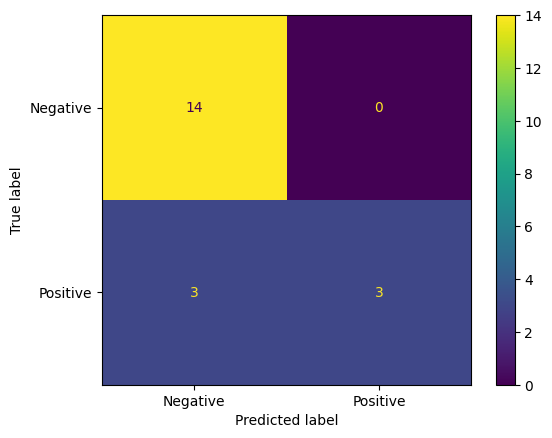

In [28]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
cmd.plot()

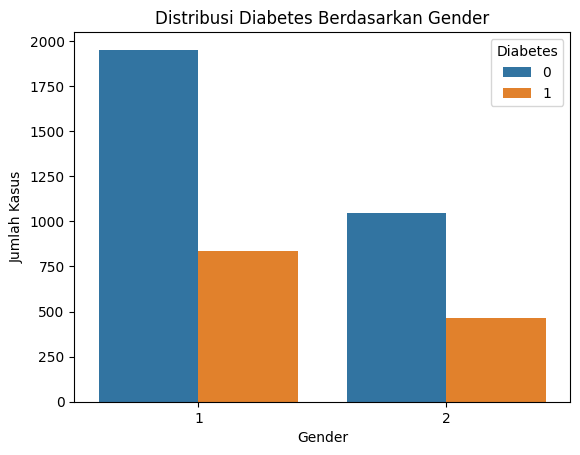

In [29]:
sns.countplot(data=data, x='Gender', hue='Diabetes')
plt.xlabel('Gender')
plt.ylabel('Jumlah Kasus')
plt.title('Distribusi Diabetes Berdasarkan Gender')
plt.show()

In [30]:
data['Gender'].value_counts()

Gender
1    2790
2    1513
Name: count, dtype: int64

In [31]:
data['Diabetes'].value_counts()

Diabetes
0    3000
1    1303
Name: count, dtype: int64

In [32]:
X_test[0:20]

,Age,Gender,BMI,SBP,DBP,FPG,Chol,FFPG
2811,36,1,23.40,113,72,5.13,4.14,4.90
1818,36,2,22.30,113,72,4.23,4.72,5.23
1808,27,1,19.30,112,68,4.03,3.21,4.70
271,53,1,24.20,133,85,3.76,5.02,4.90
474,33,1,22.40,110,62,5.41,3.08,5.00
2972,53,2,24.24,155,77,4.57,5.01,5.58
1607,36,1,24.50,116,68,4.61,3.59,4.40
3390,71,1,25.20,143,91,5.00,4.00,7.10
979,29,2,17.80,113,72,4.01,4.52,4.00
1493,38,1,32.60,121,72,5.60,4.94,5.49


In [33]:
Y_test[0:20]

2811    0
1818    0
1808    0
271     0
474     0
2972    0
1607    0
3390    1
979     0
1493    0
3957    1
3699    1
4102    1
552     0
1814    0
1428    0
3260    1
2441    0
3701    1
2522    0
Name: Diabetes, dtype: int64

7. Membuat Model Prediksi

In [35]:
input_data = (31, 1, 16.50, 123, 69, 4.30, 3.78, 4.87)

input_data_as_numpy_array = np.asarray(input_data)
#mengonversi tuple input_data menjadi array NumPy, dengan hasil data dalam bentuk array yang dapat lebih mudah diolah dan 
# digunakan untuk melakukan prediksi dengan model yang telah di latih.

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
#cara untuk mengubah bentuk (shape) dari array NumPy input_data_as_numpy_array
#1, menunjukkan bahwa Anda ingin array tersebut memiliki satu baris.
#-1, digunakan untuk membiarkan NumPy menghitung ukuran kolom yang sesuai berdasarkan jumlah elemen yang ada. Dengan kata 
# lain, NumPy akan menyesuaikan jumlah kolom secara otomatis berdasarkan ukuran array dan jumlah elemen yang ada, sehingga 
# tetap konsisten dengan satu baris.

prediction = KNN.predict(input_data_reshaped)
#langkah untuk melakukan prediksi berdasarkan data yang telah Anda persiapkan dan diubah bentuknya (input_data_reshaped) 
# menggunakan model klasifikasi (classifier) yang telah Anda latih sebelumnya.

print(prediction)

if (prediction[0] == 0):
    print('Pasien Tidak Terkena Diabetes')
else:
    print('Pasien Terkena Diabetes')

[0]
Pasien Tidak Terkena Diabetes


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


8. Simpan Model

In [31]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

#pickle.dump: Ini adalah fungsi dari pustaka pickle yang digunakan untuk menyimpan objek Python ke dalam berkas.
#classifier: Ini adalah objek model klasifikasi yang ingin Anda simpan.
#open(filename, 'wb'): Ini membuka berkas dengan nama filename dalam mode binary write ('wb') untuk menyimpan data.